In [1]:
# For Data preparation and manipulation
import numpy as np 
import pandas as pd

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Reading the dataset
loan_train = pd.read_csv(r"C:\Users\ADMIN\Desktop\virtualtoday\train_ctrUa4K.csv")
loan_test = pd.read_csv(r"C:\Users\ADMIN\Desktop\virtualtoday\test_lAUu6dG.csv")

In [4]:
loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
loan_train.shape # to check the shape of the train dataset(observation,features)

(614, 13)

In [6]:
loan_test.shape

(367, 12)

In [7]:
loan_train.info()
## to get column data type, number of features so on

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


There are 614 entries,13 features and some of the coulmns has null values

# Exploratory Data Analysis

In [10]:
## to find the number of null values in each feature of Train dataframe

loan_train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [11]:
loan_test.isna().sum()## null Values in Test dataframe

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [12]:
## defining function to get the value counts of feature
def object_type_count(df ,feature_name):
     if df[feature_name].dtype ==  'object':
        print(df[feature_name].value_counts())

In [13]:
object_type_count(loan_train, 'Gender')## number of unique 

Male      489
Female    112
Name: Gender, dtype: int64


In [14]:
for featurename in loan_train:
    if loan_train[featurename].dtype == 'object':
        print( "\n"+featurename+" Value count are :" )
        object_type_count(loan_train,featurename)


Loan_ID Value count are :
LP001248    1
LP002161    1
LP001560    1
LP001426    1
LP001138    1
           ..
LP001205    1
LP002205    1
LP001144    1
LP001993    1
LP002527    1
Name: Loan_ID, Length: 614, dtype: int64

Gender Value count are :
Male      489
Female    112
Name: Gender, dtype: int64

Married Value count are :
Yes    398
No     213
Name: Married, dtype: int64

Dependents Value count are :
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Education Value count are :
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Self_Employed Value count are :
No     500
Yes     82
Name: Self_Employed, dtype: int64

Property_Area Value count are :
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Loan_Status Value count are :
Y    422
N    192
Name: Loan_Status, dtype: int64


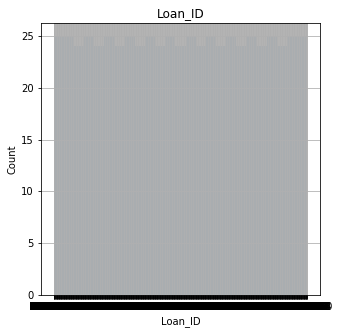

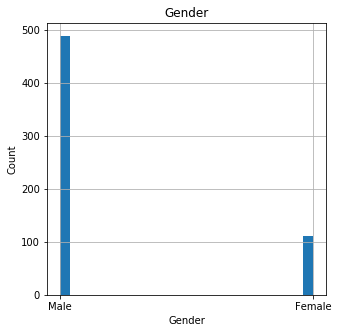

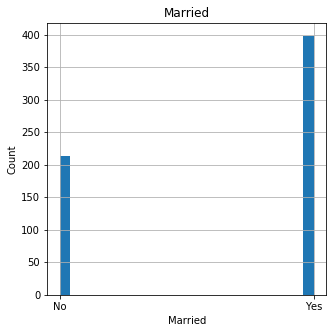

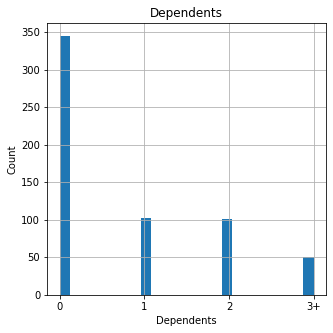

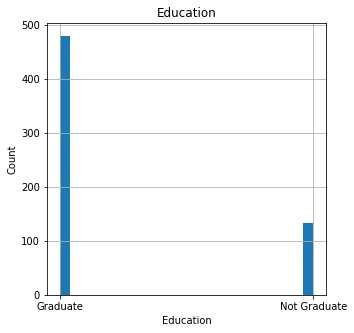

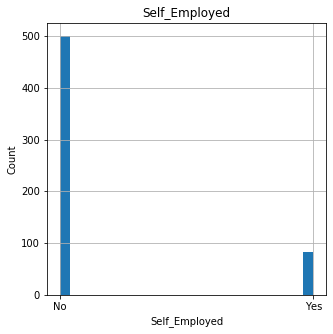

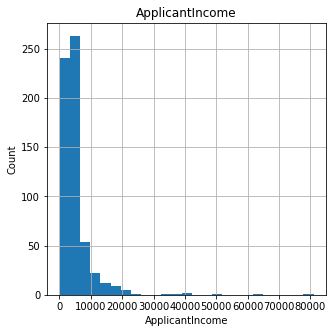

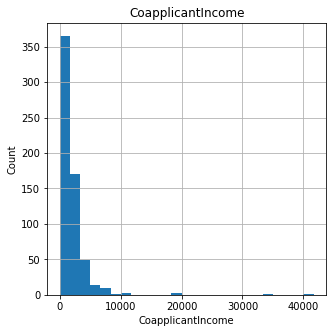

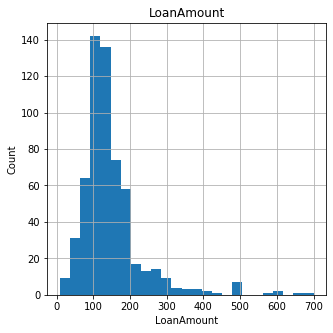

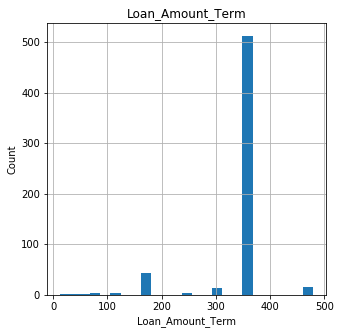

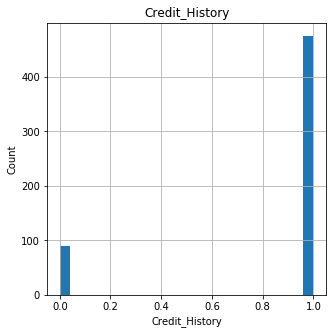

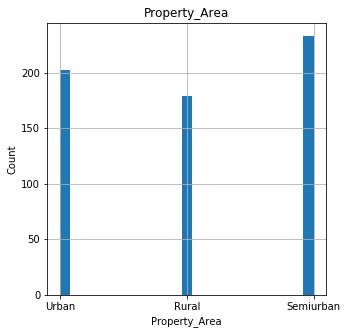

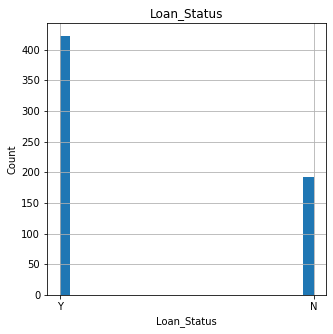

In [15]:
for feature in loan_train:
    data = loan_train.copy()
    data[feature].hist(figsize=(5,5),bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

In [17]:
### Replacing the null values with median as data is skewed

loan_train['LoanAmount'].fillna(loan_train['LoanAmount'].median(), inplace=True) 
loan_test['LoanAmount'].fillna(loan_test['LoanAmount'].median(), inplace=True)

loan_train['Loan_Amount_Term'].fillna(loan_train['Loan_Amount_Term'].median(), inplace=True) 
loan_test['Loan_Amount_Term'].fillna(loan_test['Loan_Amount_Term'].median(), inplace=True)


## below null values of the following features is repaced with mode

loan_train['Gender'].fillna(loan_train['Gender'].mode()[0], inplace=True)
loan_test['Gender'].fillna(loan_test['Gender'].mode()[0], inplace=True)

loan_train['Dependents'].fillna(loan_train['Dependents'].mode()[0], inplace=True)
loan_test['Dependents'].fillna(loan_test['Dependents'].mode()[0], inplace=True)

loan_train['Married'].fillna(loan_train['Married'].mode()[0], inplace=True)
loan_test['Married'].fillna(loan_test['Married'].mode()[0], inplace=True)

loan_train['Credit_History'].fillna(loan_train['Credit_History'].mode()[0], inplace=True)
loan_test['Credit_History'].fillna(loan_test['Credit_History'].mode()[0], inplace=True)

loan_train['Self_Employed'].fillna(loan_train['Self_Employed'].mode()[0], inplace=True) 
loan_test['Self_Employed'].fillna(loan_test['Self_Employed'].mode()[0], inplace=True)

# Data Visualisation

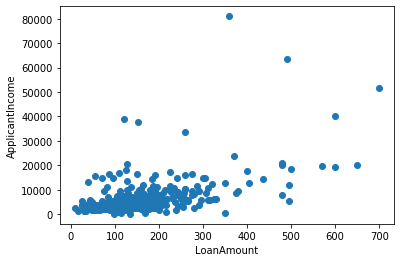

In [18]:
plt.scatter(loan_train['LoanAmount'],loan_train['ApplicantIncome'])
plt.ylabel('ApplicantIncome')
plt.xlabel('LoanAmount')
plt.show()

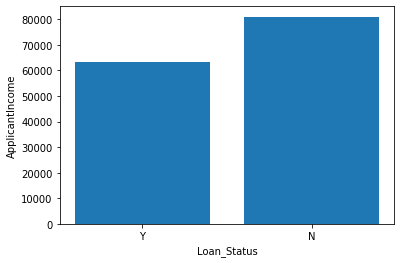

In [19]:
plt.bar(loan_train['Loan_Status'],loan_train['ApplicantIncome'])
plt.ylabel('ApplicantIncome')
plt.xlabel('Loan_Status')
plt.show()

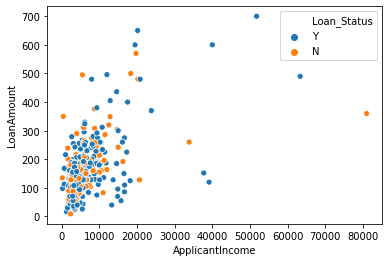

In [20]:
sns.scatterplot(x = 'ApplicantIncome', y = 'LoanAmount', data = loan_train, hue = 'Loan_Status')

## Relation ship Between ApplicantIncome,LoanAmount and Loan_Status

# Pre-Processing(Train data)

In [21]:
## Label Encodeing Categorical Data

from sklearn.preprocessing import LabelEncoder
feature_col = ['Property_Area','Education', 'Dependents','Gender','Married','Self_Employed','Loan_Status']
l_encod = LabelEncoder()
for col in feature_col:
    loan_train[col] = l_encod.fit_transform(loan_train[col])
   

In [22]:
loan_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [23]:
loan_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


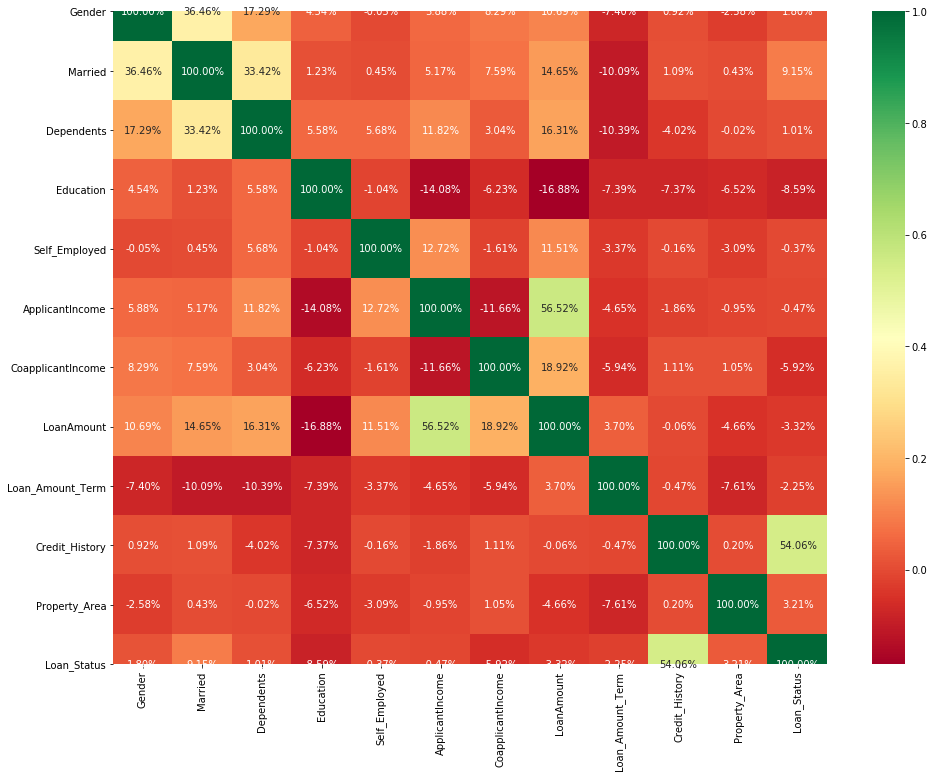

In [28]:
matrix = loan_train.drop(['Loan_ID'],axis=1)
train_corr = matrix.corr()
plt.figure(figsize = (16, 12))
sns.heatmap(train_corr, cmap = 'RdYlGn', annot = True, fmt = '.2%')

# Pre-Processing(Test data)

In [29]:
## Encoding of test data
feature_col = ['Property_Area','Education', 'Dependents','Gender','Married','Self_Employed']
for col in feature_col:
    loan_test[col] = l_encod.fit_transform(loan_test[col])

# Model Training

In [31]:
### Creating testing and training to check model accuracy data using train data set

x = loan_train.drop(['Loan_ID','Loan_Status'],axis = 1) ## independent variable
y = loan_train['Loan_Status']

In [32]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size= 0.25,random_state= 0)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
## Logistic Regression model

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)
pred = model.predict(x_test)
LR=accuracy_score(y_test, pred)

## DecisionTreeClassifier model
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)
pred = model.predict(x_test)
DTC=  accuracy_score(y_test, pred)

from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=10).fit(x_train,y_train)
pred = rf_classifier.predict(x_test)
forest = accuracy_score(y_test,pred)



print ("The result were as Follows")
print("\nRandom Forest Classifer",forest)
print("\n\nLogistic Regression ", LR)
print("\n\n Decision Tree Classifier", DTC)

C:\ProgramData\Anaconda4\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The result were as Follows

Random Forest Classifer 0.7922077922077922


Logistic Regression  0.8376623376623377


 Decision Tree Classifier 0.7012987012987013


As the accuracy score we can confirm that Logistic Regression has high accuracy, so we create our model with LogisticRegression()

In [36]:
X_train = loan_train.drop(['Loan_ID','Loan_Status'],axis = 1).values
Y_train = loan_train['Loan_Status'].values

X_test = loan_test.drop(['Loan_ID'],axis = 1).values


In [37]:
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
prediction = model.predict(X_test)

C:\ProgramData\Anaconda4\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [38]:
prediction

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,

In [39]:
submission = pd.read_csv(r"C:\Users\ADMIN\Desktop\virtualtoday\sample_submission_49d68Cx.csv")

In [40]:
submission['Loan_ID']= loan_test['Loan_ID']
submission['Loan_Status'] = prediction

In [41]:
submission

,Loan_ID,Loan_Status
0,LP001015,0
1,LP001022,1
2,LP001031,1
3,LP001035,0
4,LP001051,0
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [42]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [43]:
submission

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,Y
2,LP001031,Y
3,LP001035,N
4,LP001051,N
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [55]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('Test_Loan_Prediction.csv')

In [59]:

loan_train = pd.read_csv(r"C:\Users\ADMIN\Desktop\virtualtoday\train_ctrUa4K.csv")
loan_test = pd.read_csv(r"C:\Users\ADMIN\Desktop\virtualtoday\test_lAUu6dG.csv")

In [67]:
df =pd.read_csv(r"C:\Users\ADMIN\Desktop\virtualtoday\train_ctrUa4K.csv")

In [68]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [69]:
df.set_index('Loan_ID',inplace = True)

In [70]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [71]:
df =pd.read_csv(r"C:\Users\ADMIN\Desktop\virtualtoday\test_lAUu6dG.csv")

In [72]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [73]:
df.set_index('Loan_ID',inplace = True)

In [74]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [80]:
pd.DataFrame(submission,columns=['Loan_ID','Loan_Status']).to_csv('Test_Loan_Prediction.csv')